In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
optimum = {}

for size in range(1300, 1501, 50):
    optimum[(size, False)] = 8
    optimum[(size, True)] = 8

best = pd.read_csv('data/adapt_best.csv')
for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    optimum[(int(size),bool(pin))] = int(best_row['threads'])

print(optimum)

{(1300, False): 8, (1300, True): 8, (1350, False): 8, (1350, True): 8, (1400, False): 8, (1400, True): 8, (1450, False): 8, (1450, True): 8, (1500, False): 8, (1500, True): 8, (500, False): 16, (500, True): 16, (550, False): 16, (550, True): 16, (600, False): 16, (600, True): 16, (650, False): 16, (650, True): 16, (700, False): 16, (700, True): 16, (750, False): 16, (750, True): 16, (800, False): 16, (800, True): 15, (850, False): 15, (850, True): 16, (900, False): 16, (900, True): 16, (950, False): 16, (950, True): 15, (1000, False): 14, (1000, True): 16, (1050, False): 16, (1050, True): 16, (1100, False): 8, (1100, True): 12, (1150, False): 15, (1150, True): 15, (1200, False): 8, (1200, True): 12, (1250, False): 8, (1250, True): 12}


In [51]:
fast = pd.read_csv('data/adapt_fast.csv')
slow = pd.read_csv('data/adapt_slow.csv')
slow

,size,pin,threads,runtime,usertime,energy
0,800,False,16,0.197521,3.101942,8.618019
1,800,False,16,0.195275,3.072771,8.456888
2,800,False,16,0.196046,3.078128,8.502786
3,800,False,16,0.195469,3.078115,8.563943
4,800,False,16,0.196213,3.086668,8.581032
...,...,...,...,...,...,...
1995,800,True,8,0.386956,3.078175,11.207063
1996,800,True,8,0.393985,3.072875,11.285250
1997,800,True,8,0.386751,3.074511,11.195405
1998,800,True,8,0.386639,3.071402,11.158053


In [52]:
fast['optimum'] = fast.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)
slow['optimum'] = slow.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)

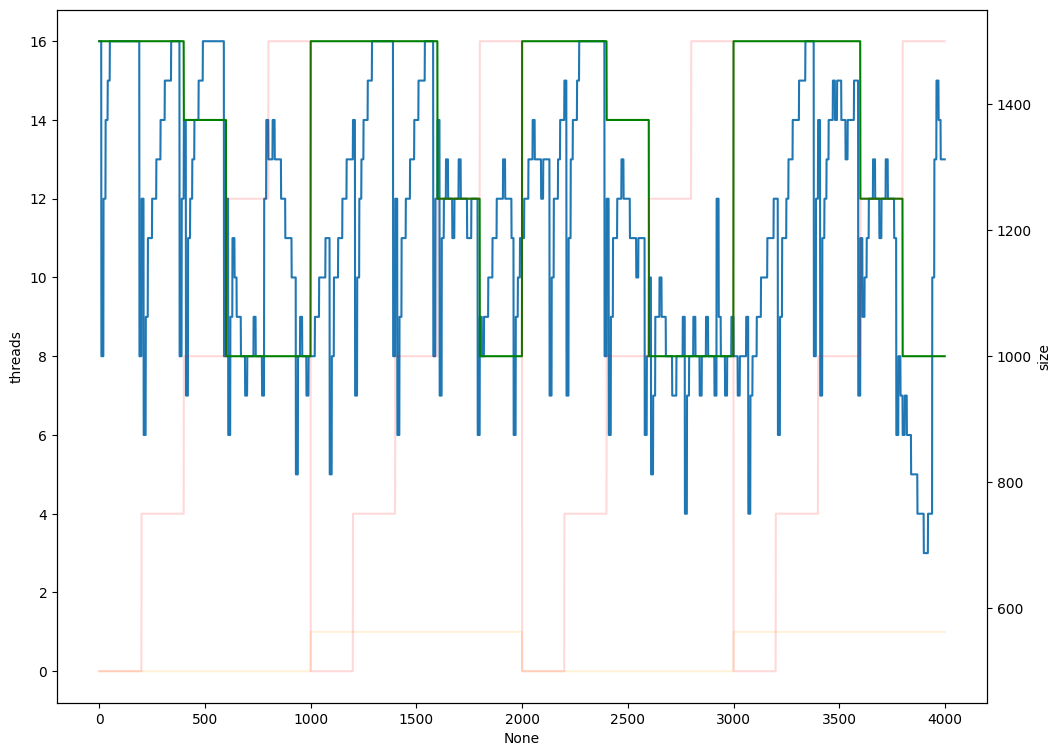

In [53]:
plt.figure(figsize=(12,9))

x = fast.index

ax = sns.lineplot(x=x, y=fast['threads'])
sns.lineplot(x=x, y=fast['optimum'], color='g', ax=ax)

sns.lineplot(x=x, y=fast['pin'], color='orange', alpha=0.15, ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=x, y=fast['size'], color='r', alpha=0.15, ax=ax2)

plt.savefig('images/adapt_fast.png')
plt.show()

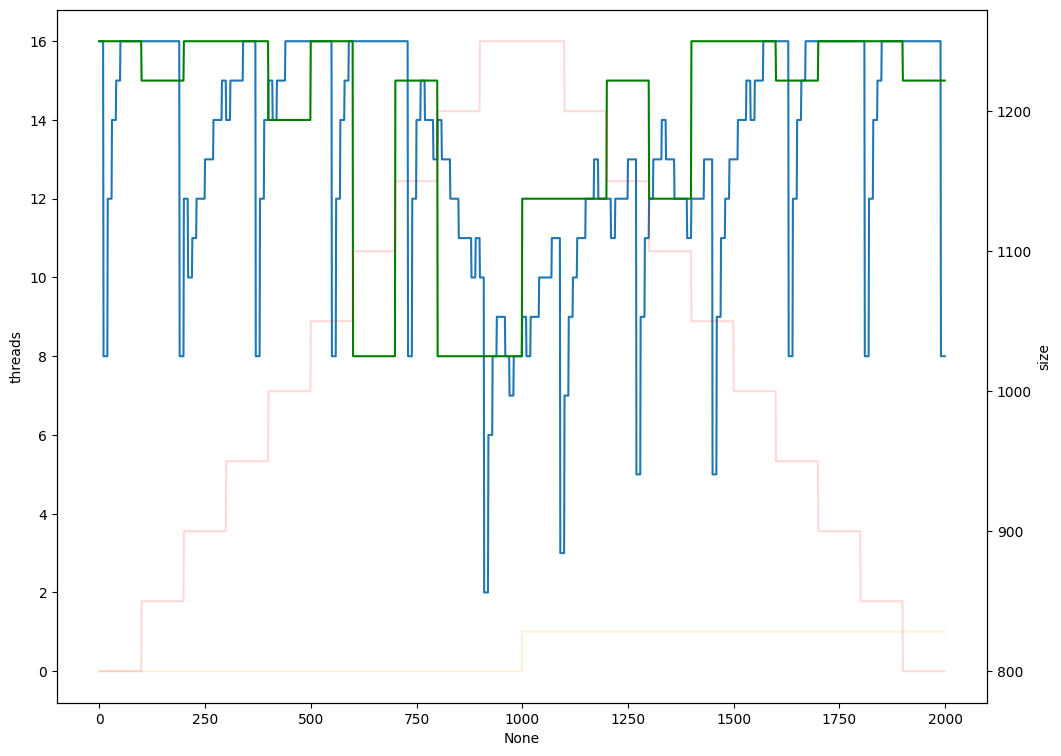

In [54]:
plt.figure(figsize=(12,9))

x = slow.index

ax = sns.lineplot(x=x, y=slow['threads'])
sns.lineplot(x=x, y=slow['optimum'], color='g', ax=ax)

sns.lineplot(x=x, y=slow['pin'], color='orange', alpha=0.15, ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=x, y=slow['size'], color='r', alpha=0.15, ax=ax2)

plt.savefig('images/adapt_slow.png')
plt.show()

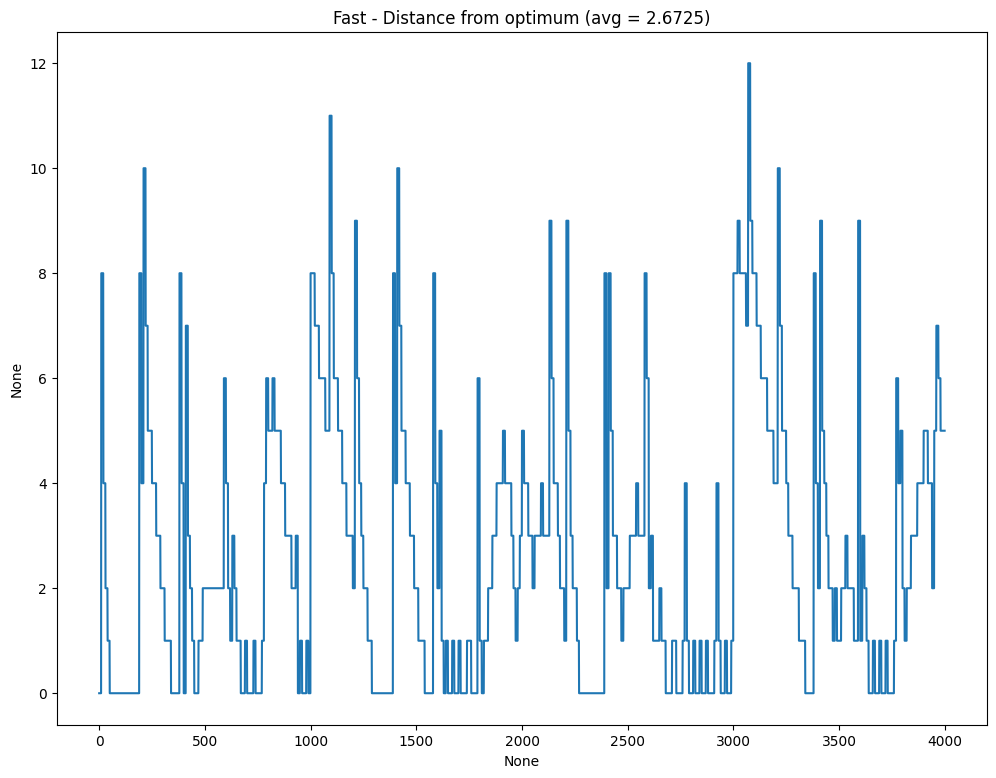

In [55]:
plt.figure(figsize=(12,9))
dt = fast['threads'].sub(fast['optimum']).abs()
sns.lineplot(x=fast.index, y=dt)
plt.title(f'Fast - Distance from optimum (avg = {dt.sum() / len(dt)})')
plt.show()

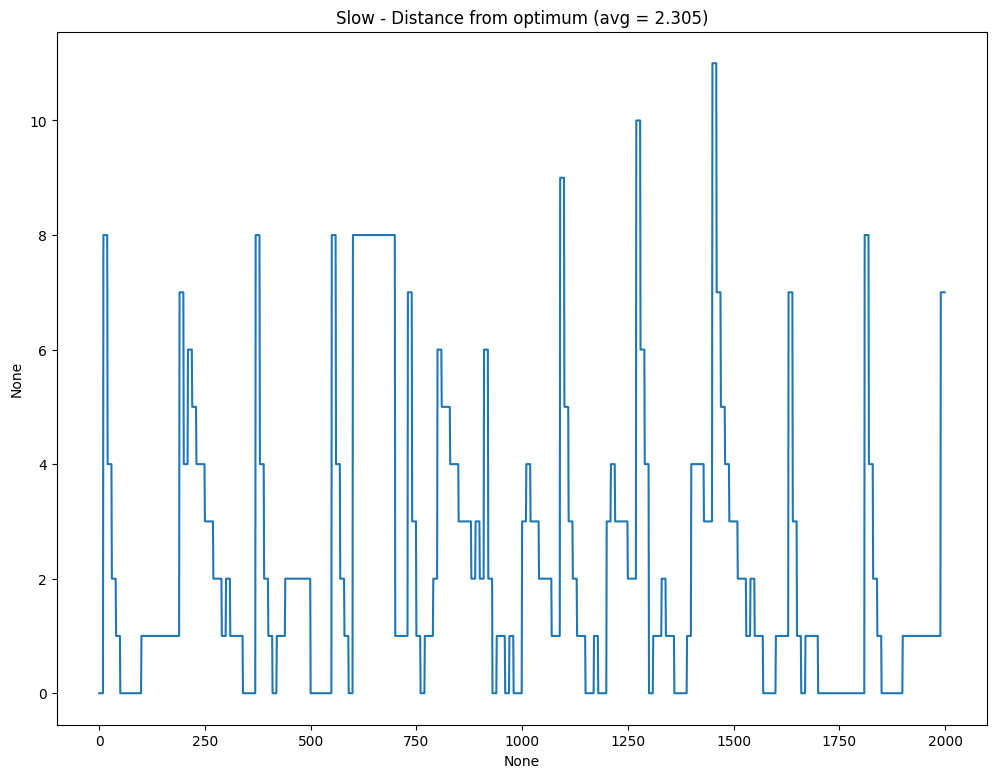

In [56]:
plt.figure(figsize=(12,9))
dt = slow['threads'].sub(slow['optimum']).abs()
sns.lineplot(x=slow.index, y=dt)
plt.title(f'Slow - Distance from optimum (avg = {dt.sum() / len(dt)})')
plt.show()